In [1]:
import numpy as np
from scipy import stats #is a library of techniques for numerical and scientific computing
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### SCIPY

For this course, we will primarily be using the SciPy.Stats sub-module. SciPy.Stats calculates density and mass functions, cumulative distribution functions, and quantile functions for many probability distributions. 


As a starting example, suppose we want to evaluate the cumulative distribution function(CDF) of the standard normal distribution at zero. Since zero is the median of the standard normal distribution, the resulting cumulative probability should be

In [2]:
stats.norm.cdf(0)

np.float64(0.5)

Below are some additional examples of working with probability distributions

In [3]:
#the median of a standard student's t distribution with 10 degrees of freedom
print(stats.t(10).ppf(0.5))

#the 97.5 percentile of a standard student's t distribution with 5 degrees of freedom
print(stats.t(5).ppf(0.975))

#the probability that the value of an exponential distribution is less than or equal to 3
print(stats.expon.cdf(3)) 

#The height of the standard normal density function at 1
print(stats.norm.pdf(1))

#The probability of getting exactly 3 heads in 10 flips of a fair coin
print(stats.binom(10,0.5).pmf(3))

#The probabulity of getting 3 or fewer heads in 10 flips of a fair coin
print(stats.binom(10,0.5).cdf(3))

6.805747424058503e-17
2.570581835636314
0.950212931632136
0.24197072451914337
0.1171875
0.171875


### Matplotlib

Matplotlib is a plotting library

first we plot a sine wave:

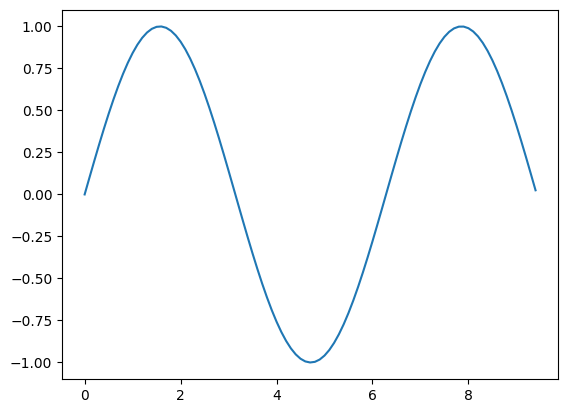

In [4]:
# Compute the x and y coordinates for points on a sine curve

x= np.arange(0,3*np.pi,0.1)
y= np.sin(x)

# Plot the points using matplotlib
plt.plot(x,y)

Next we make it a bit fancier with a grid, axis labels and coloured broken plotting lines

Text(0.5, 0, 'X')

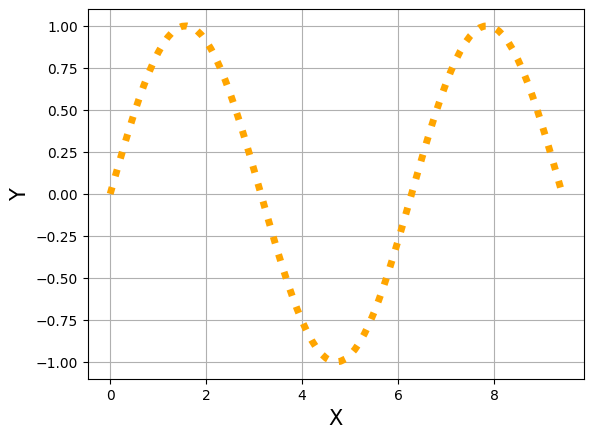

In [7]:
plt.grid(True)
plt.plot(x,y,':',lw=5,color='orange')
plt.ylabel('Y', size=15)
plt.xlabel('X', size=15)

The next graph plots a sine wave and a cosine wave on the same axis, and labels them so that they can be distinguished

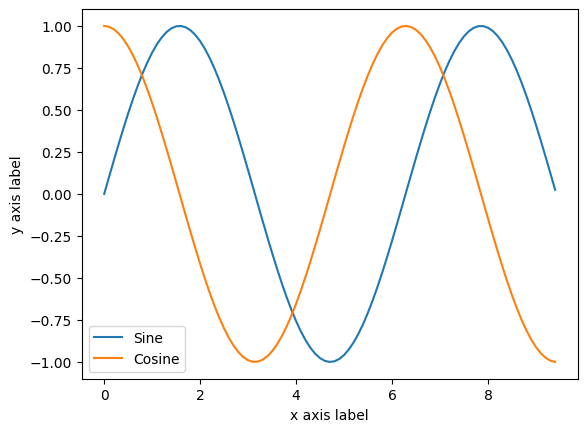

In [8]:
# Compute the x and y coordinates for the points on sine and cosine curves
x = np.arange(0,3*np.pi,0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x,y_sin)
plt.plot(x,y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.legend(['Sine','Cosine'])

Sometimes its good to have multiple plots on the window and this can be done as follows

Text(0.5, 1.0, 'Cosine')

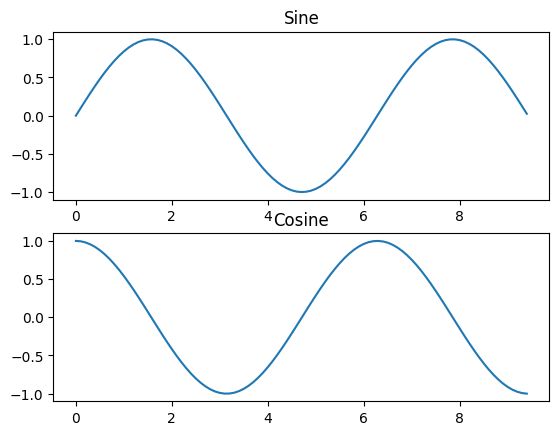

In [9]:
# Compute the x and y coordinates for points on sine and cosine curves 
x = np.arange(0,3*np.pi,0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1
# and set the first such subplot as active
plt.subplot(2,1,1)

# Make the first plot
plt.plot(x,y_sin)
plt.title('Sine')

# Set the second dubplot to active, and make the second plot
plt.subplot(2,1,2)
plt.plot(x,y_cos)
plt.title('Cosine')

### Seaborn

Seaborn is essentially a higher level interface to Matplotlib that is intended to make statistical data visualization easier
Any plot that can be made in Seaborn can be made in Matplotlib but certain types of graphs are easier to make in Seaborn and others are easier in Matplotlib

#### Scatterplots

The following plot is a basic scatterplot

<Axes: xlabel='Wingspan', ylabel='CWDistance'>

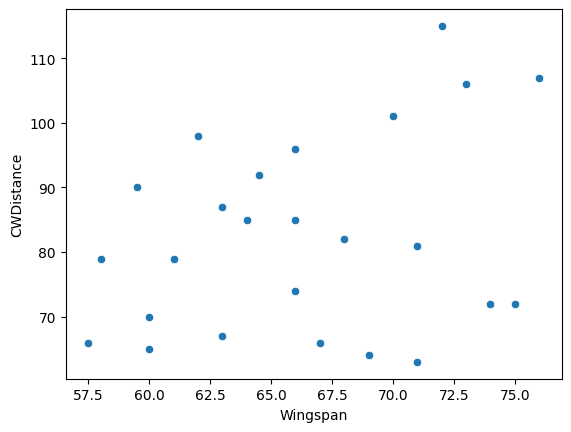

In [11]:
# Store the url string that hosts our .csv file
url = 'Cartwheeldata.csv'

# Read the .csv file and store it as a pandas DataFrame
df = pd.read_csv(url)

# Create scatterplot
sns.scatterplot(x='Wingspan', y='CWDistance', data=df)

Now we add more information to the scatterplot, by plotting females and males in different colours

<Axes: xlabel='Wingspan', ylabel='CWDistance'>

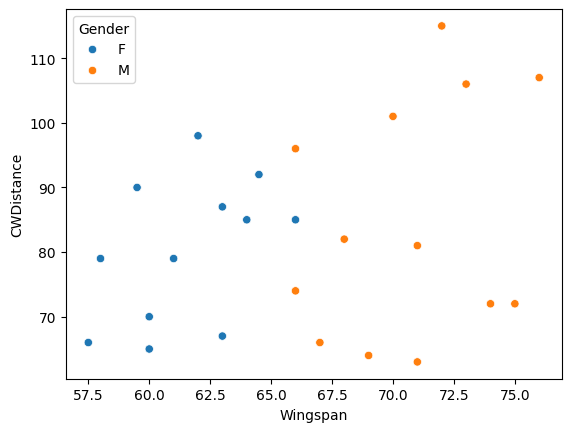

In [26]:
sns.scatterplot(x='Wingspan', y='CWDistance', hue='Gender', data=df)

A swarmplot is a type of scatterplot for situations where one varaiable is categorical. Note that the categorical variable is jittered to reduce overplotting 

<Axes: xlabel='Gender', ylabel='CWDistance'>

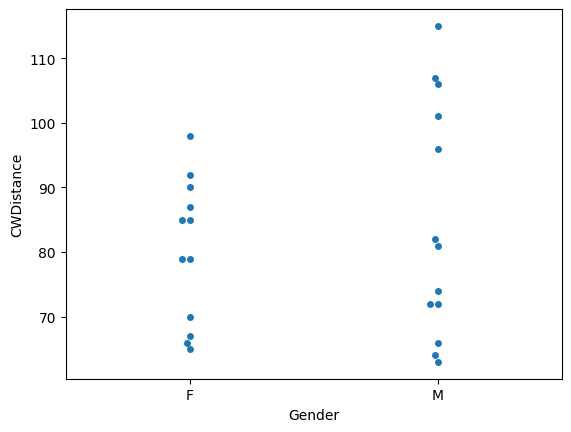

In [12]:
sns.swarmplot(x='Gender',y='CWDistance',data=df)

#### Boxplots

A boxplot is one of the most useful ways to display several distributions side by side for comparism

<Axes: >

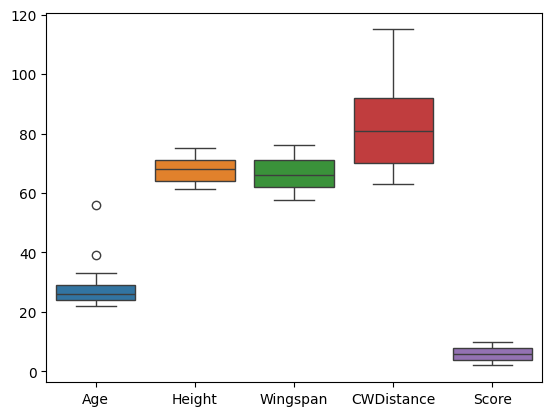

In [13]:
sns.boxplot(data=df.loc[:,['Age','Height','Wingspan','CWDistance','Score']])

<Axes: >

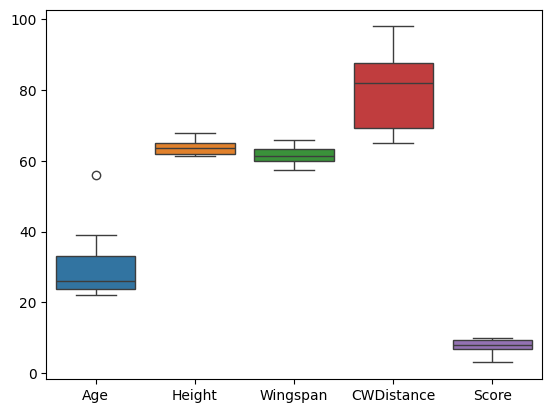

In [32]:
# A boxplot of only females
sns.boxplot(data=df.loc[df['Gender']=='F',['Age','Height','Wingspan','CWDistance','Score']])

<Axes: >

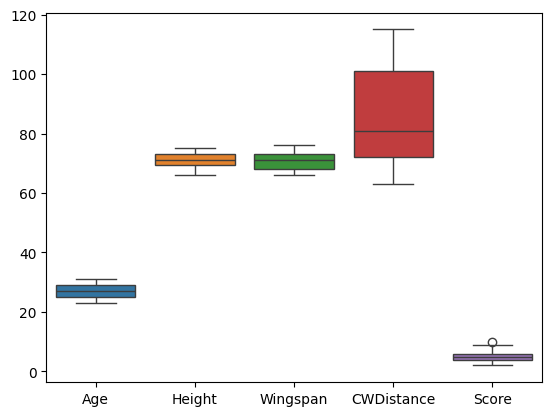

In [14]:
# A boxplot of only males
sns.boxplot(data=df.loc[df['Gender']=='M',['Age','Height','Wingspan','CWDistance','Score']])

#### Histogram

A histogram is a way to display the shape of a distribution

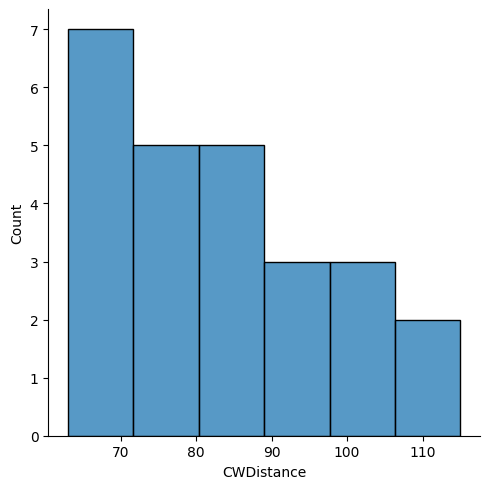

In [15]:
sns.displot(df.CWDistance)

#### Count Plot

A count plot (a.k.a bar plot) displays frequencies

([0, 1], [Text(0, 0, 'F'), Text(1, 0, 'M')])

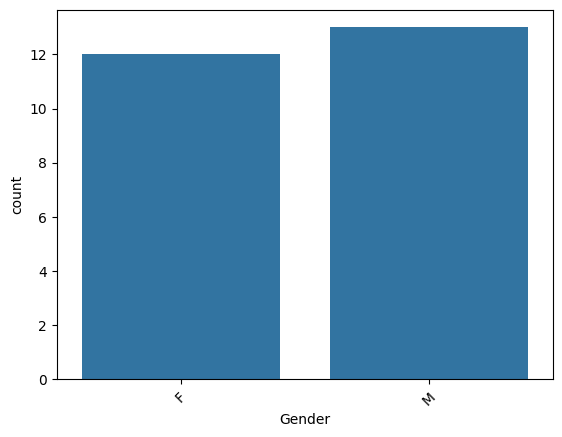

In [16]:
sns.countplot(x='Gender', data=df)
plt.xticks(rotation=45)

## Visualizing Data in Python

#### Tables, Histogram, Boxplots
When working with a new dataset, one of the most useful ways to begin the analysis is to visualize the data. By using tables, histograms, box plots, and other visual tools, we can get a better idea of what the data may be able to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In [17]:
# We first need to import the necessary packages
import seaborn as sns # for plotting
import matplotlib.pyplot as plt # for showing plots 

Next we read the data from the file system and use it to construct a Pandas dataframe.

In [18]:
# Load the data into a dataframe
tips_data = sns.load_dataset('tips')

#### Visualizing the Data - Tables

When you begin working with a new data set, it is often useful to inspect the first few rows of data. This will show you the kind of dataset youre working with

In [19]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Describe Data

Summary statistics, including the mean, minimum, and maximum of the data, can be useful to get a feel for central tendency and dispersion of each varaiable

In [20]:
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### Creating a Histogram

A histogram captures the shape of the distribution of the data

Text(0.5, 1.0, 'Histogram of Total Bill')

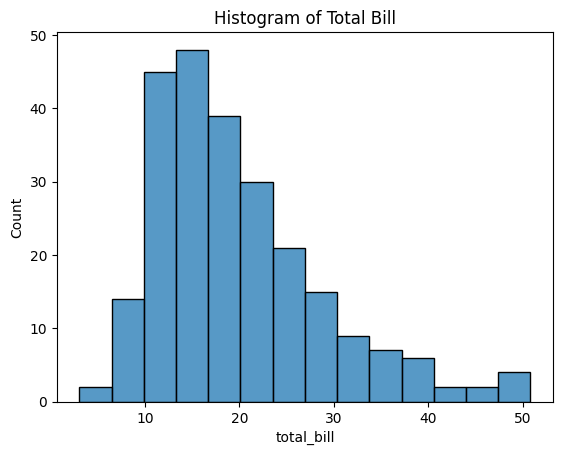

In [21]:
sns.histplot(tips_data['total_bill'], kde = False).set_title('Histogram of Total Bill')

Text(0.5, 1.0, 'Histogram of Total tip')

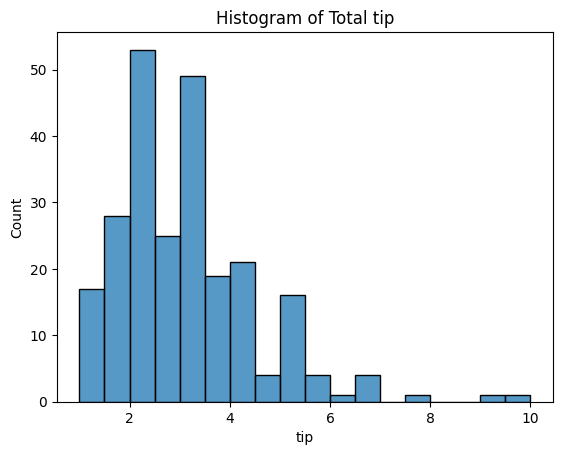

In [22]:
sns.histplot(tips_data['tip'],kde=False).set_title('Histogram of Total tip')

The tips data are bivariate -- each customer has both a total bill value and a tip value. This allows us to plot one of these variables against the other in a scatterplot. It is natural to expect the tip to be larger when the total bill is larger. This relationship is evident in the scatterplot below.

<Axes: xlabel='total_bill', ylabel='tip'>

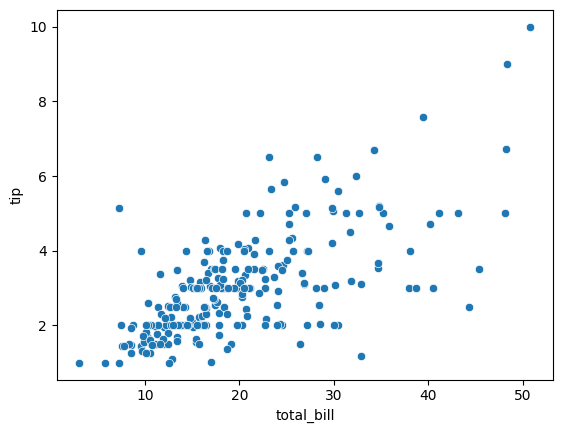

In [23]:
sns.scatterplot(x='total_bill', y='tip', data = tips_data)

We may wish to stratify our data according to some factors e.g gender

<Axes: xlabel='total_bill', ylabel='tip'>

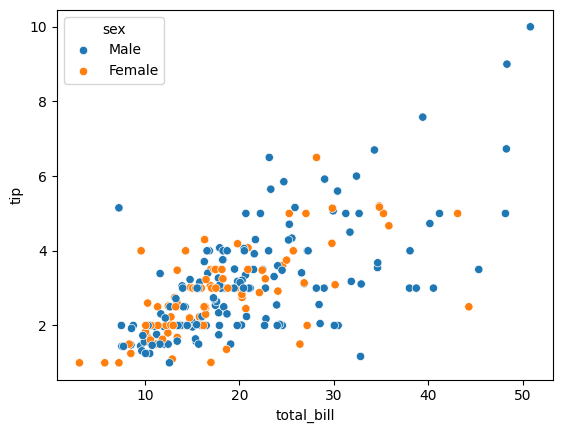

In [24]:
sns.scatterplot(x='total_bill',y='tip', hue='sex',data=tips_data)

#### Creating a boxplot

Histograms require a lot of data to produce accurate estimates of population density. Boxplots show a minimal amount of information about the shape of the distribution and can be very informative for smaller datasets



Below we create a boxplot of the bill amount. The median bill is around 18 dollars, and half of the bills fall between 12 and 24 dollars (approximately). Extreme bills may be as large as 40 dollars, with a small number of bills being even larger than 40 dollars.

Text(0.5, 1.0, 'Box plot of the Total Bill')

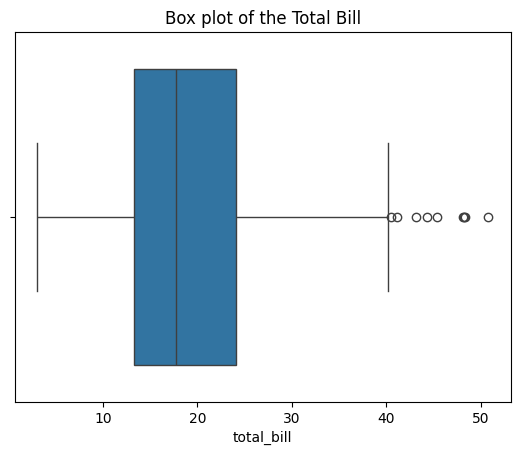

In [49]:
sns.boxplot(x=tips_data['total_bill']).set_title('Box plot of the Total Bill')

Now we create a boxplot of the tip amount

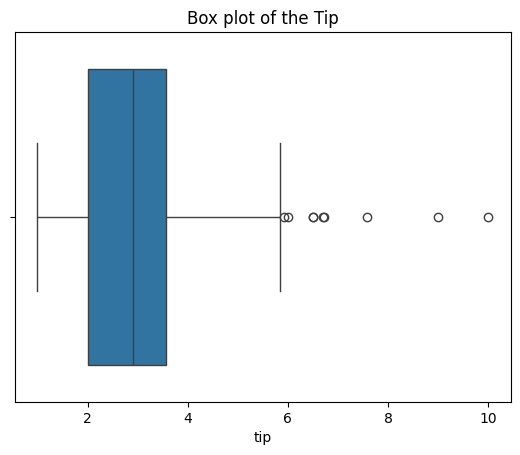

In [50]:
sns.boxplot(x=tips_data['tip']).set_title('Box plot of the Tip')
plt.show()

#### Creating a histogram and boxplots stratified by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in coordination with another

For example lets see the tipping value of smokers compared with non-smokers

<Axes: xlabel='tip', ylabel='smoker'>

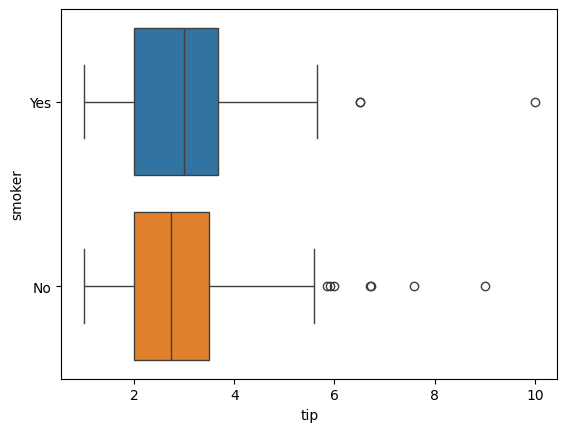

In [54]:
sns.boxplot(x=tips_data['tip'],y=tips_data['smoker'],hue=tips_data['smoker'])

<Axes: xlabel='tip', ylabel='time'>

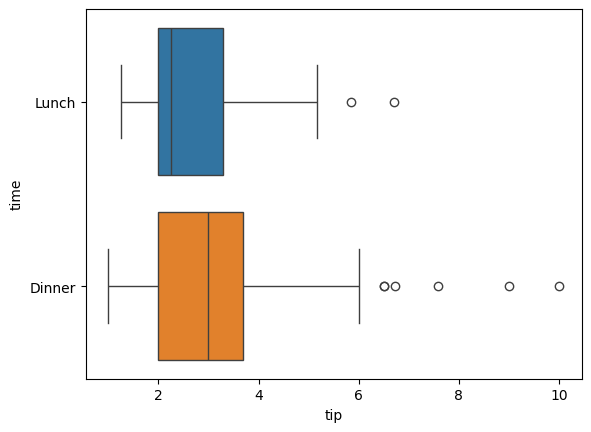

In [55]:
sns.boxplot(x=tips_data['tip'],y=tips_data['time'],hue=tips_data['time'])

We can also compare the tip distributions based on whether the tip was paid for lunch and dinner

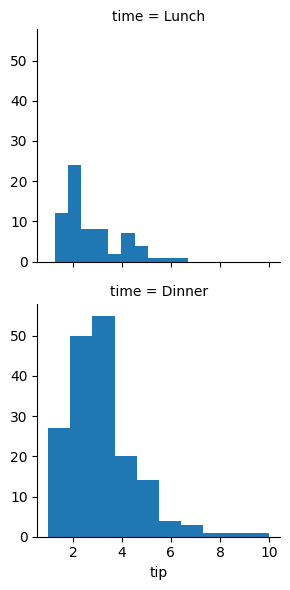

In [56]:
g = sns.FacetGrid(tips_data, row='time')
g = g.map(plt.hist, 'tip')

Next we look at the distribution of tips by day of the week, using bixplots to show the main features of ditributions

<Axes: xlabel='tip', ylabel='day'>

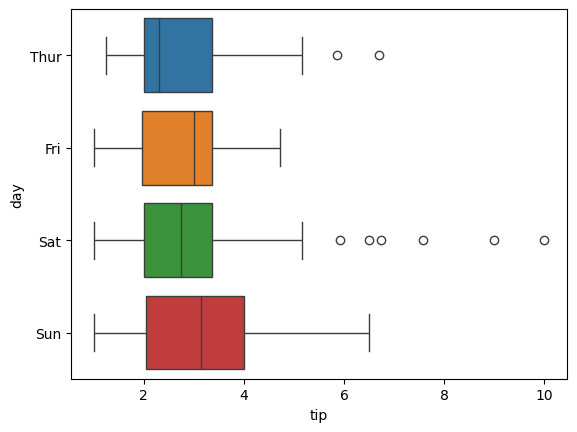

In [57]:
sns.boxplot(x = tips_data['tip'], y = tips_data['day'], hue=tips_data['day'])

Histograms can capture more features of a distribution, but if a sample is small a histogram may be quite imprecise

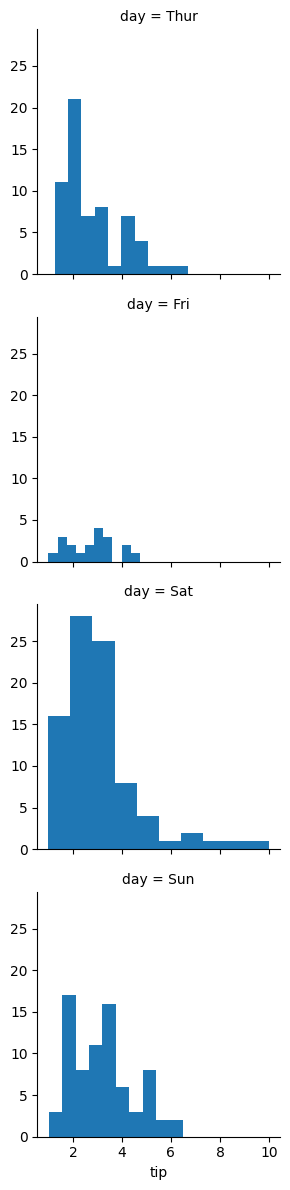

In [58]:
g = sns.FacetGrid(tips_data, row='day')
g = g.map(plt.hist, 'tip')